Working with WDI dataset

In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from fancyimpute import SimpleFill
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_excel('/home/lolo/WDI_excel/WDIEXCEL.xlsx', sheet_name='Data')

In [3]:
print(df.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')


Latin America and the Caribbean

In [4]:
LA_CAS = np.array(['ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARUBA', 'BAHAMAS, THE', 'BARBADOS', 'BELIZE', 'BOLIVIA', 'BRAZIL',
                  'BRITISH VIRGIN ISLANDS', 'CAYMAN ISLANDS', 'CHILE', 'COLOMBIA', 'COSTA RICA', 'CUBA', 'CURACAO', 'DOMINICA',
                  'DOMINICAN REPUBLIC', 'ECUADOR', 'EL SALVADOR', 'GRENADA', 'GUATEMALA', 'GUYANA', 'HAITI', 'HONDURAS','JAMAICA',
                  'MEXICO', 'NICARAGUA', 'PANAMA', 'PARAGUAY', 'PERU', 'PUERTO RICO', 'SINT MAARTEN (DUTCH PART)', 'ST. KITTS AND NEVIS',
                  'ST. LUCIAST. MARTIN (FRENCH PART)', 'ST. VINCENT AND THE GRENADINES', 'SURINAME', 'TRINIDAD AND TOBAGO', 'TURKS AND CAICOS ISLANDS',
                  'URUGUAY', 'VENEZUELA, RB', 'VIRGIN ISLANDS (U.S.)'])

In [5]:
LA_CAs = [] 
for i in LA_CAS: 
        LA_CAs.append(i.lower()) 
print(LA_CAs)        
print(len(LA_CAs))

['antigua and barbuda', 'argentina', 'aruba', 'bahamas, the', 'barbados', 'belize', 'bolivia', 'brazil', 'british virgin islands', 'cayman islands', 'chile', 'colombia', 'costa rica', 'cuba', 'curacao', 'dominica', 'dominican republic', 'ecuador', 'el salvador', 'grenada', 'guatemala', 'guyana', 'haiti', 'honduras', 'jamaica', 'mexico', 'nicaragua', 'panama', 'paraguay', 'peru', 'puerto rico', 'sint maarten (dutch part)', 'st. kitts and nevis', 'st. luciast. martin (french part)', 'st. vincent and the grenadines', 'suriname', 'trinidad and tobago', 'turks and caicos islands', 'uruguay', 'venezuela, rb', 'virgin islands (u.s.)']
41


All countries

In [6]:
CNS = df['Country Name']

In [7]:
CNs = [] 
for i in CNS: 
    if i.lower() not in CNs: 
        CNs.append(i.lower()) 
print(CNs)        
print(len(CNs))

['arab world', 'caribbean small states', 'central europe and the baltics', 'early-demographic dividend', 'east asia & pacific', 'east asia & pacific (excluding high income)', 'east asia & pacific (ida & ibrd countries)', 'euro area', 'europe & central asia', 'europe & central asia (excluding high income)', 'europe & central asia (ida & ibrd countries)', 'european union', 'fragile and conflict affected situations', 'heavily indebted poor countries (hipc)', 'high income', 'ibrd only', 'ida & ibrd total', 'ida blend', 'ida only', 'ida total', 'late-demographic dividend', 'latin america & caribbean', 'latin america & caribbean (excluding high income)', 'latin america & the caribbean (ida & ibrd countries)', 'least developed countries: un classification', 'low & middle income', 'low income', 'lower middle income', 'middle east & north africa', 'middle east & north africa (excluding high income)', 'middle east & north africa (ida & ibrd countries)', 'middle income', 'north america', 'not cla

In [8]:
LA_CAs_idx = []
LA_CAs_check = []
CNs_check = []
idx = 0
for i in CNs: 
    if i in LA_CAs: 
        LA_CAs_idx.append(idx) 
        LA_CAs_check.append(i)
    else:
        CNs_check.append(i)
    idx += 1    
print(LA_CAs_idx)  
print(LA_CAs_check)
print(len(LA_CAs_idx))
print(CNs_check)
for i in LA_CAs: 
    if i not in LA_CAs_check: 
        print('MISSING: ', i)

[53, 54, 56, 60, 63, 66, 70, 73, 74, 83, 87, 89, 93, 96, 97, 102, 103, 104, 106, 125, 127, 130, 131, 132, 144, 174, 189, 198, 200, 201, 205, 219, 228, 231, 233, 243, 247, 254, 257, 259]
['antigua and barbuda', 'argentina', 'aruba', 'bahamas, the', 'barbados', 'belize', 'bolivia', 'brazil', 'british virgin islands', 'cayman islands', 'chile', 'colombia', 'costa rica', 'cuba', 'curacao', 'dominica', 'dominican republic', 'ecuador', 'el salvador', 'grenada', 'guatemala', 'guyana', 'haiti', 'honduras', 'jamaica', 'mexico', 'nicaragua', 'panama', 'paraguay', 'peru', 'puerto rico', 'sint maarten (dutch part)', 'st. kitts and nevis', 'st. vincent and the grenadines', 'suriname', 'trinidad and tobago', 'turks and caicos islands', 'uruguay', 'venezuela, rb', 'virgin islands (u.s.)']
40
['arab world', 'caribbean small states', 'central europe and the baltics', 'early-demographic dividend', 'east asia & pacific', 'east asia & pacific (excluding high income)', 'east asia & pacific (ida & ibrd coun

Indicators

In [9]:
INDs = df['Indicator Name'][0:1431]
print(INDs)

0       Access to clean fuels and technologies for coo...
1                 Access to electricity (% of population)
2       Access to electricity, rural (% of rural popul...
3       Access to electricity, urban (% of urban popul...
4       Account ownership at a financial institution o...
                              ...                        
1426    Women who believe a husband is justified in be...
1427    Women who believe a husband is justified in be...
1428    Women who were first married by age 15 (% of w...
1429    Women who were first married by age 18 (% of w...
1430    Women's share of population ages 15+ living wi...
Name: Indicator Name, Length: 1431, dtype: object


GDP

In [10]:
IND_gdp = df['Indicator Name'][464+0:464+20]
print(IND_gdp)

464                              GDP (constant 2010 US$)
465                                   GDP (constant LCU)
466                                    GDP (current LCU)
467                                    GDP (current US$)
468           GDP deflator (base year varies by country)
469    GDP deflator: linked series (base year varies ...
470                                GDP growth (annual %)
471                   GDP per capita (constant 2010 US$)
472                        GDP per capita (constant LCU)
473                         GDP per capita (current LCU)
474                         GDP per capita (current US$)
475                     GDP per capita growth (annual %)
476    GDP per capita, PPP (constant 2017 internation...
477        GDP per capita, PPP (current international $)
478        GDP per person employed (constant 2017 PPP $)
479    GDP per unit of energy use (constant 2017 PPP ...
480    GDP per unit of energy use (PPP $ per kg of oi...
481             GDP, PPP (const

GNI

In [11]:
IND_gni = df['Indicator Name'][492+0:492+16]
print(IND_gni)

492                              GNI (constant 2010 US$)
493                                   GNI (constant LCU)
494                                    GNI (current LCU)
495                                    GNI (current US$)
496                                GNI growth (annual %)
497                   GNI per capita (constant 2010 US$)
498                        GNI per capita (constant LCU)
499                         GNI per capita (current LCU)
500                     GNI per capita growth (annual %)
501           GNI per capita, Atlas method (current US$)
502    GNI per capita, PPP (constant 2017 internation...
503        GNI per capita, PPP (current international $)
504                      GNI, Atlas method (current US$)
505             GNI, PPP (constant 2017 international $)
506                   GNI, PPP (current international $)
507                     GNI: linked series (current LCU)
Name: Indicator Name, dtype: object


Some regions

In [12]:
CNs[0:47]

['arab world',
 'caribbean small states',
 'central europe and the baltics',
 'early-demographic dividend',
 'east asia & pacific',
 'east asia & pacific (excluding high income)',
 'east asia & pacific (ida & ibrd countries)',
 'euro area',
 'europe & central asia',
 'europe & central asia (excluding high income)',
 'europe & central asia (ida & ibrd countries)',
 'european union',
 'fragile and conflict affected situations',
 'heavily indebted poor countries (hipc)',
 'high income',
 'ibrd only',
 'ida & ibrd total',
 'ida blend',
 'ida only',
 'ida total',
 'late-demographic dividend',
 'latin america & caribbean',
 'latin america & caribbean (excluding high income)',
 'latin america & the caribbean (ida & ibrd countries)',
 'least developed countries: un classification',
 'low & middle income',
 'low income',
 'lower middle income',
 'middle east & north africa',
 'middle east & north africa (excluding high income)',
 'middle east & north africa (ida & ibrd countries)',
 'middle inc

average GDP and GNI or years for some regions 

/home/lolo/anaconda3/envs/ENV/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lolo/anaconda3/envs/ENV/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-13-805efbd205c2>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(rg, rotation=90)
<ipython-input-13-805efbd205c2>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(rg, rotation=90)
<ipython-input-13-805efbd205c2>:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,3))


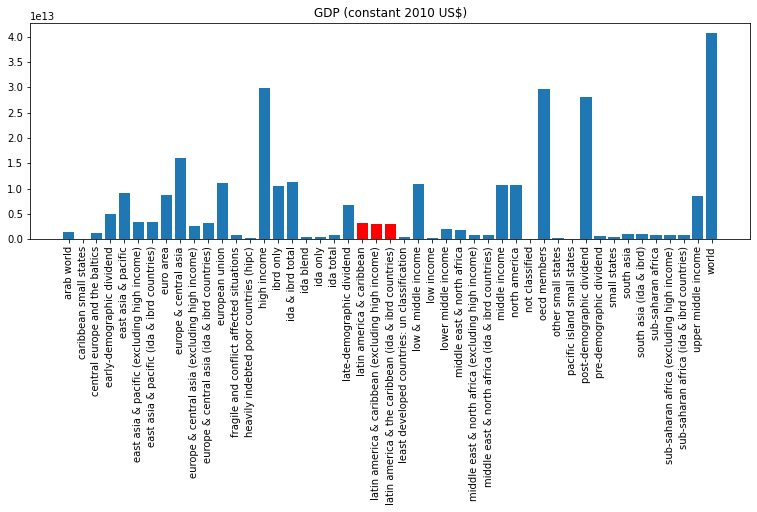

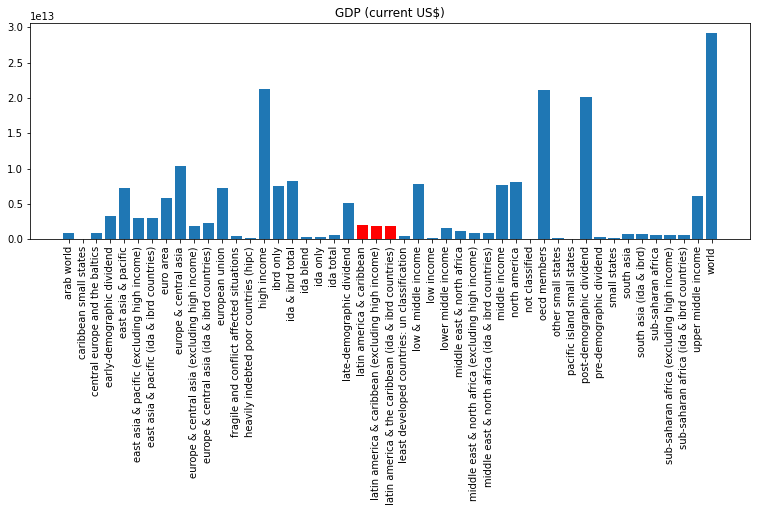

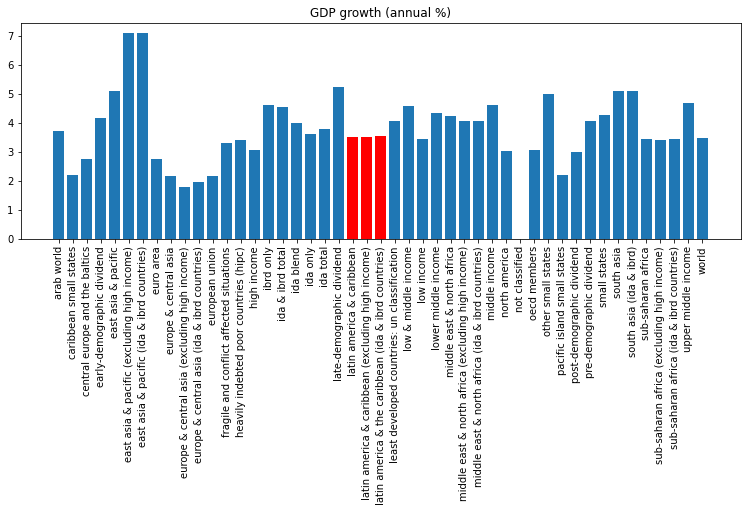

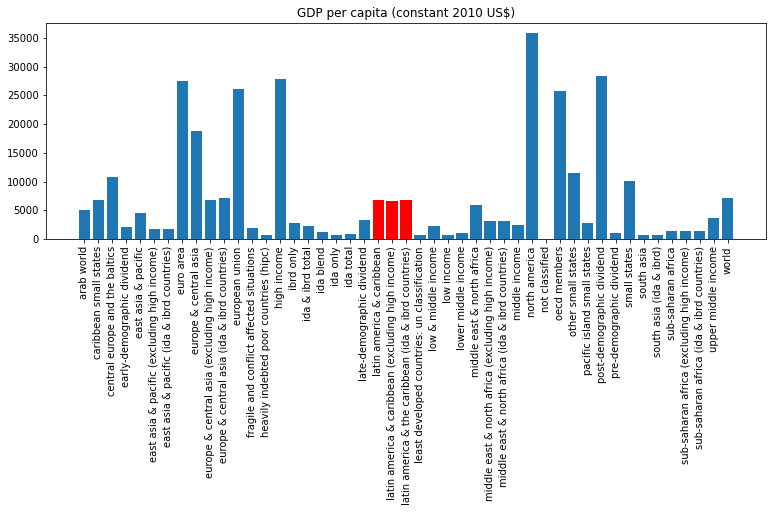

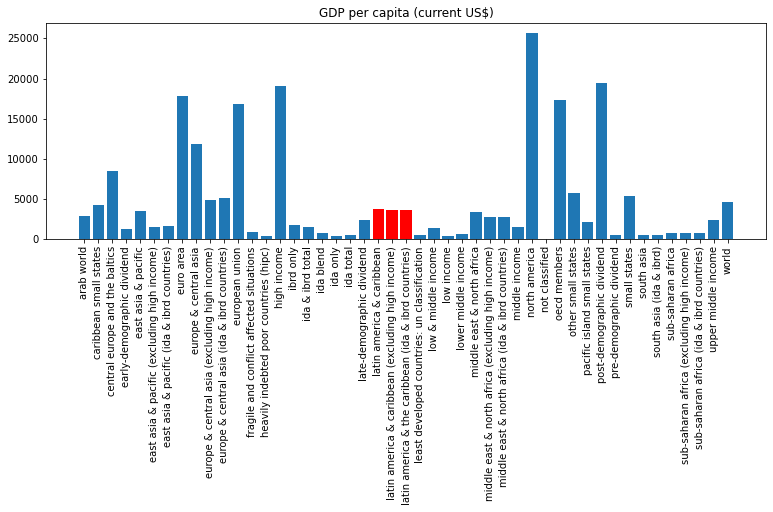

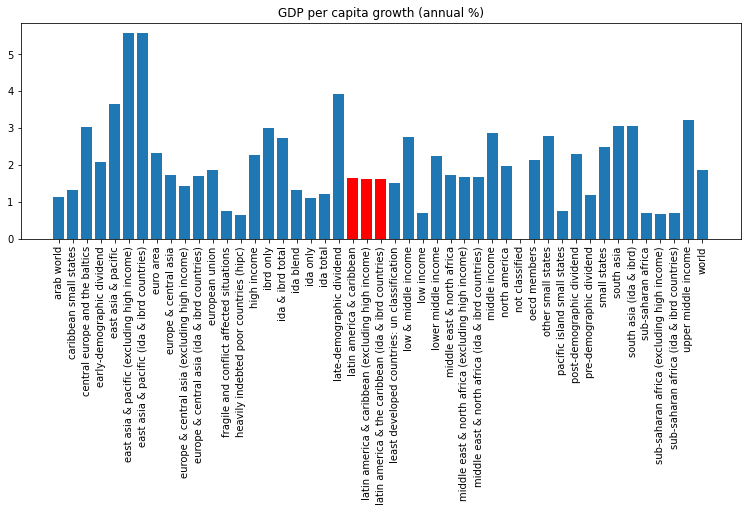

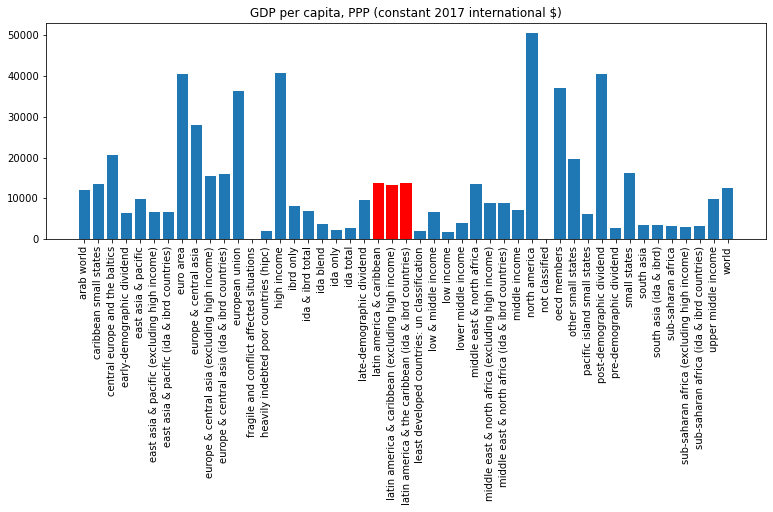

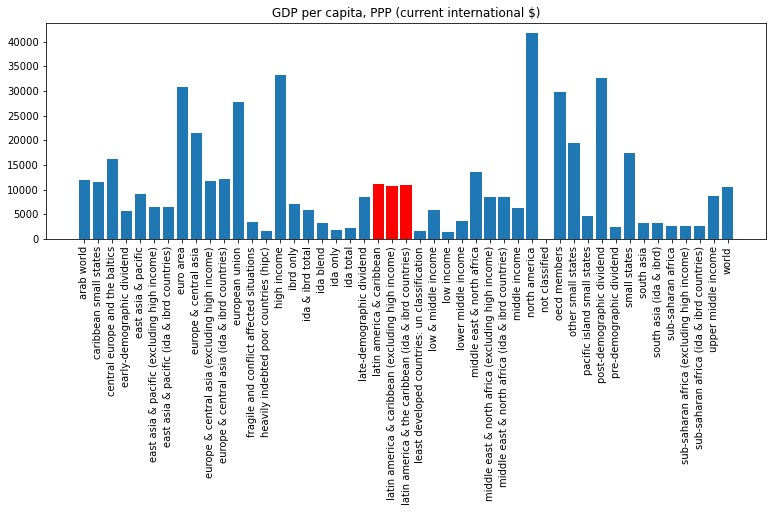

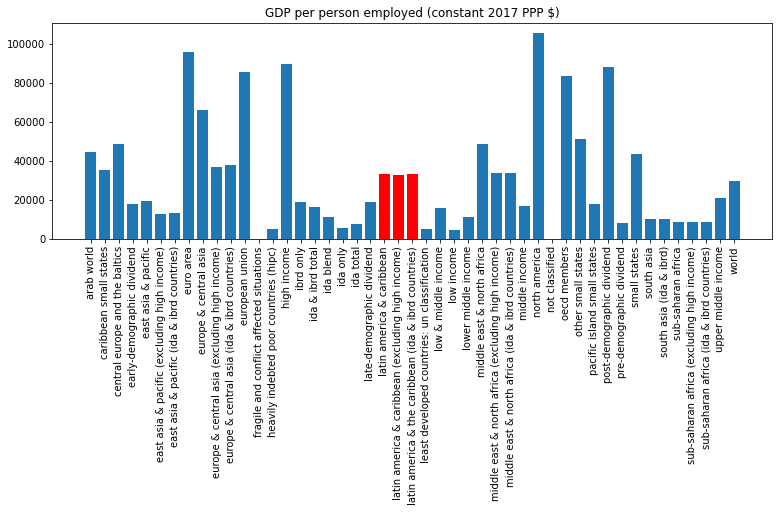

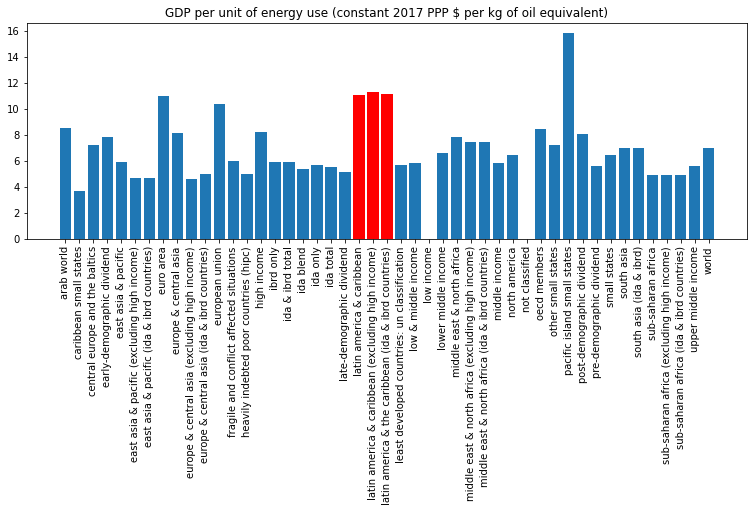

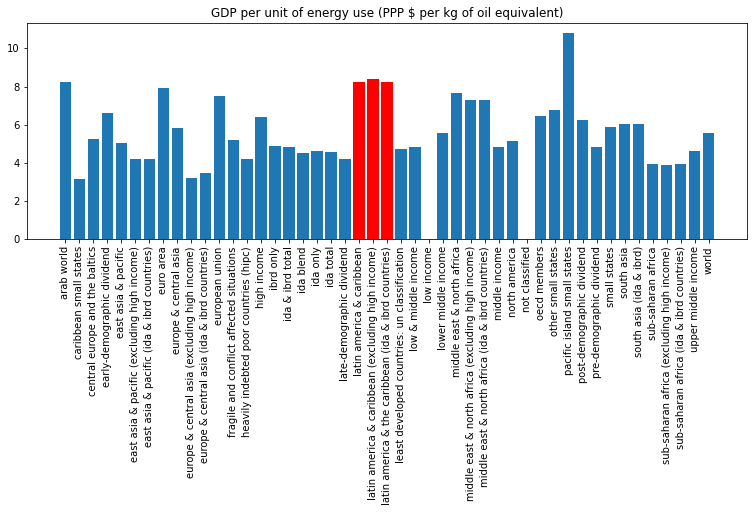

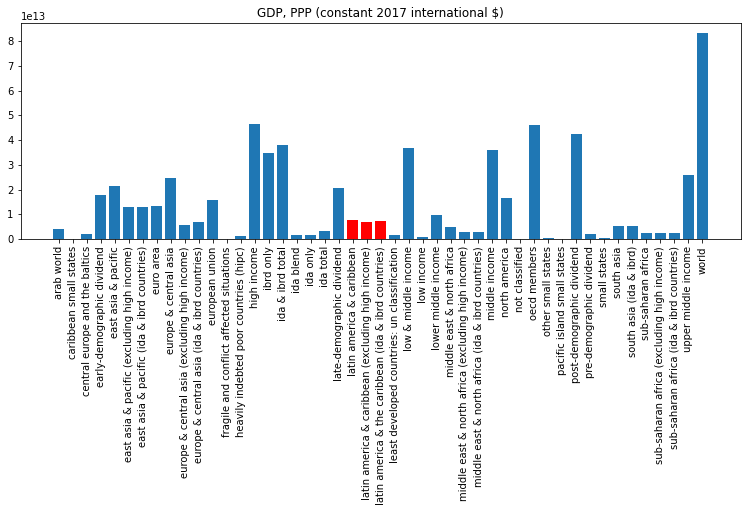

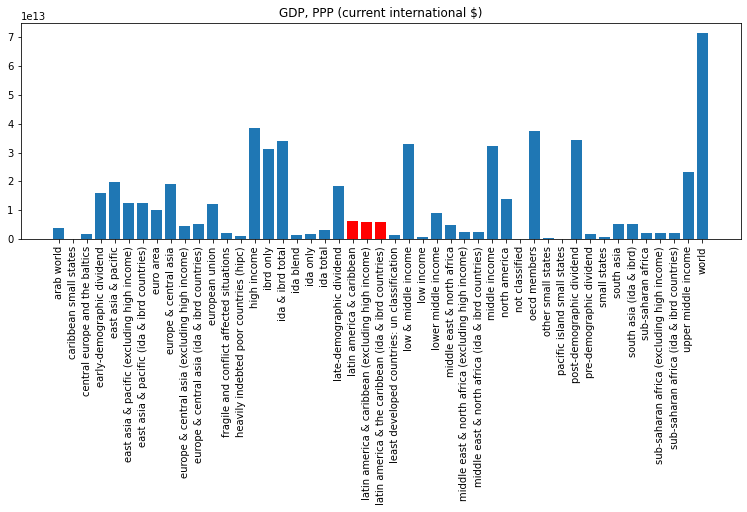

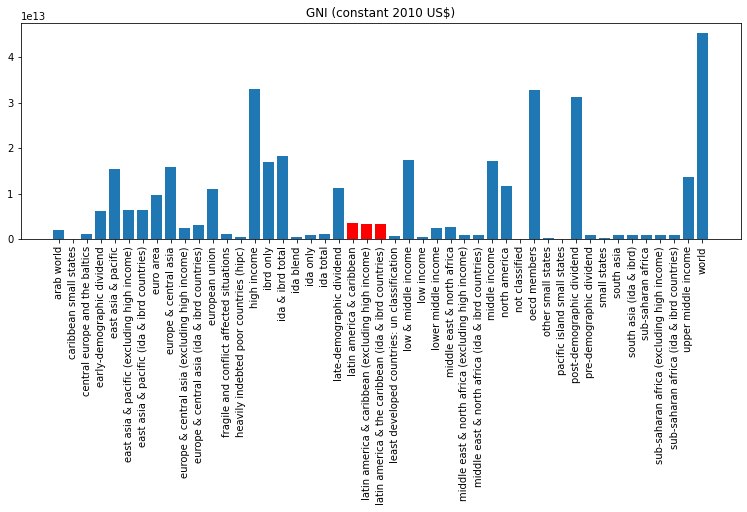

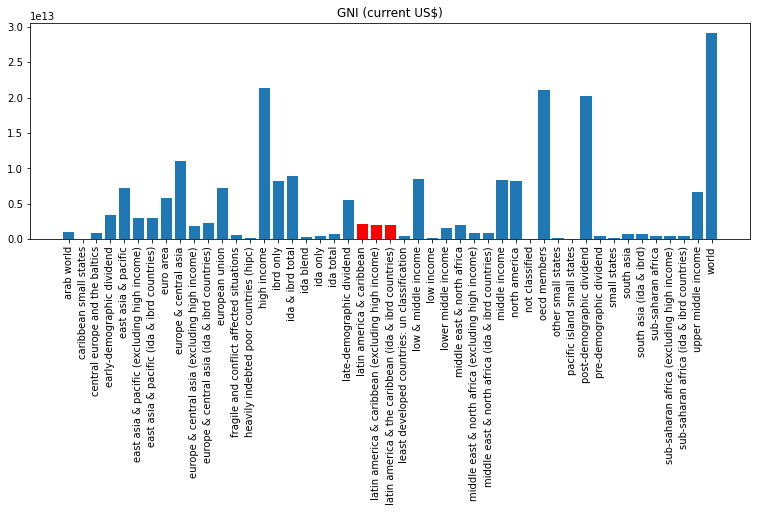

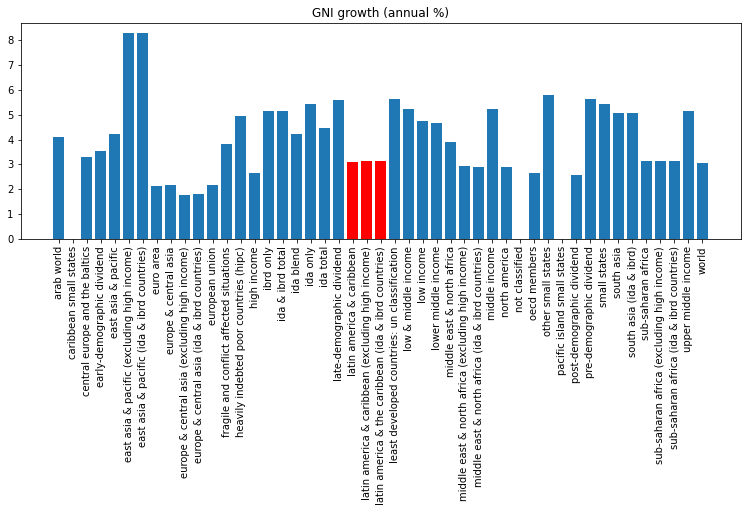

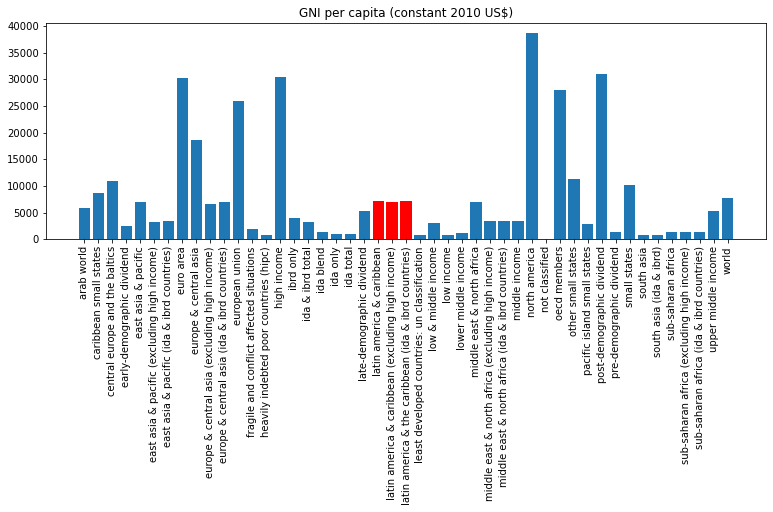

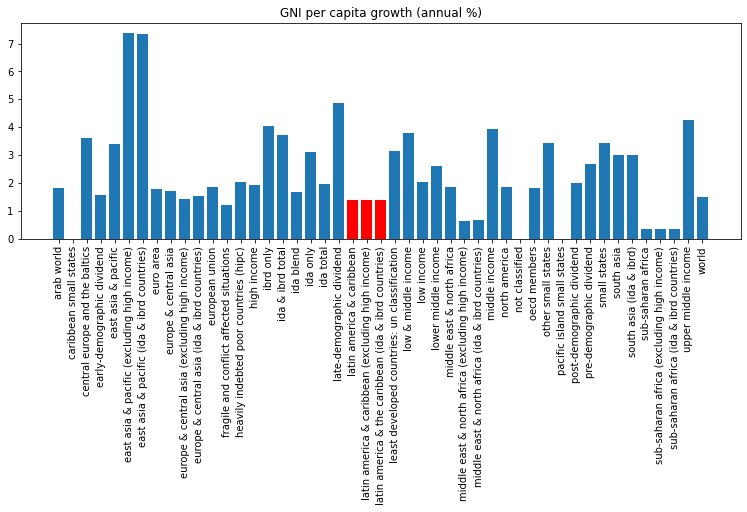

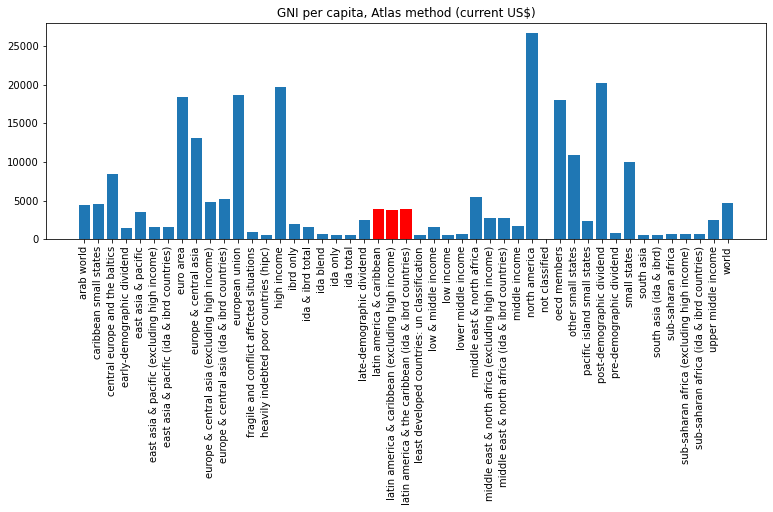

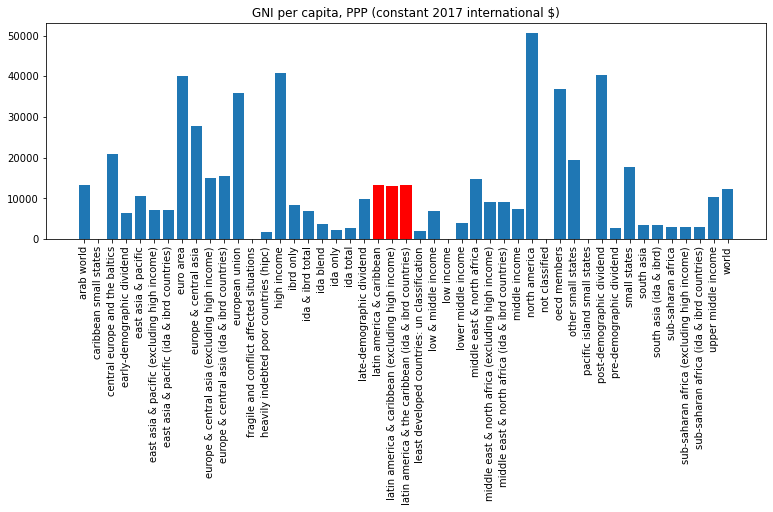

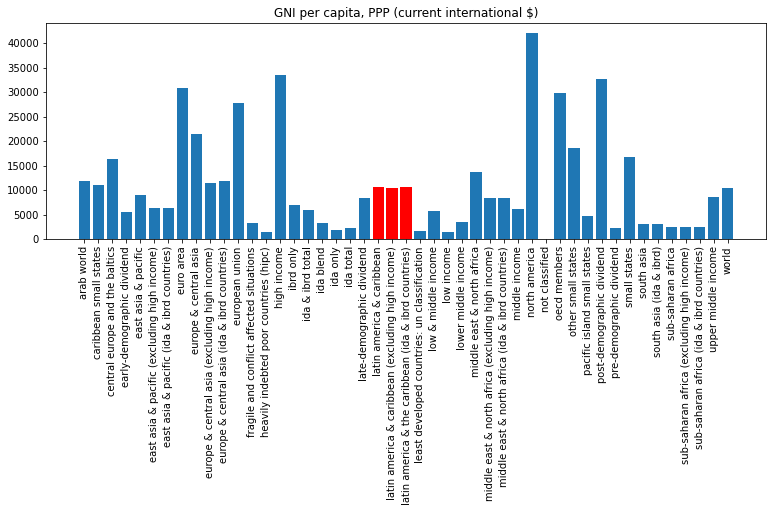

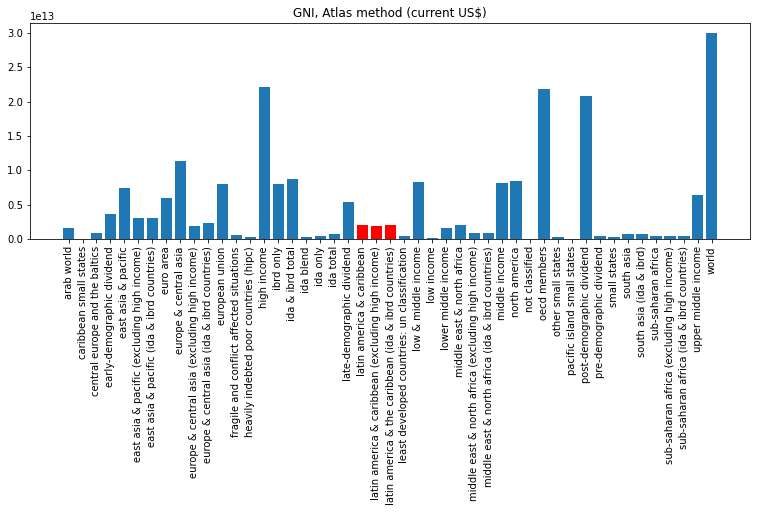

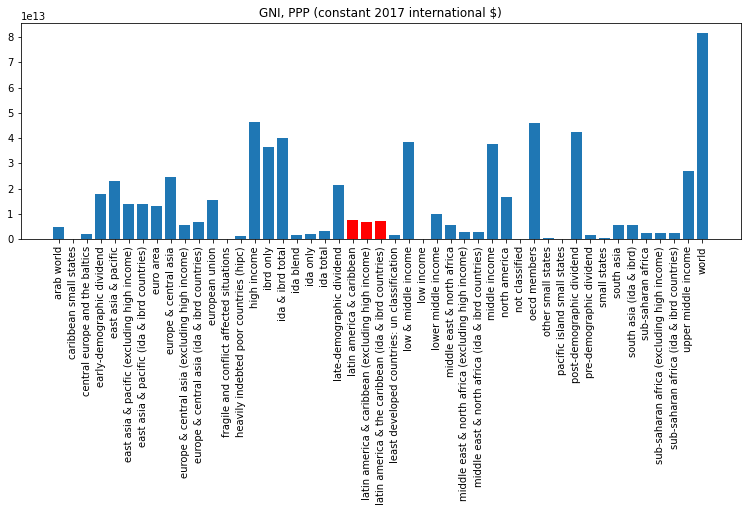

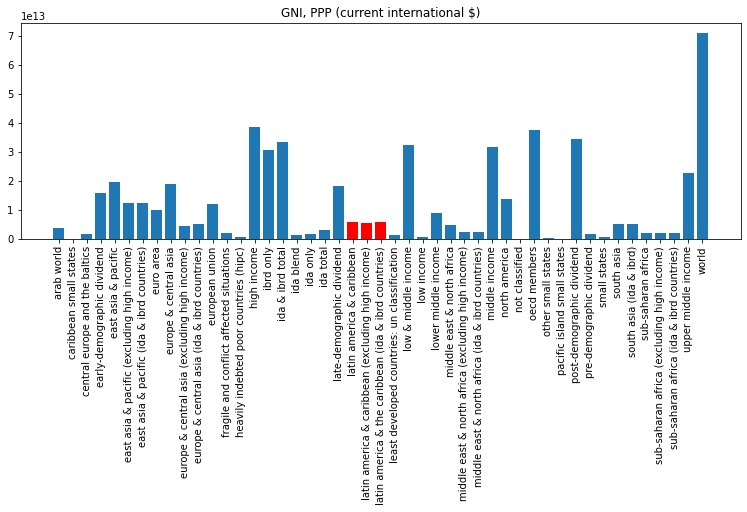

In [13]:
yrs = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']

rg = CNs[0:47]
for all in range(20):
    indics = []
    for i in range(47):
        indic = []
        for j in yrs:
            indic.append(df[j][1431*i+464+all])
        indic = np.asarray(indic)    
        indic = indic[~np.isnan(indic)]
        indics.append(np.mean(indic))
    indics = np.asarray(indics)    
    if np.isnan(np.mean(indics[~np.isnan(indics)])) == False:
        fig = plt.figure(figsize=(10,3))
        ax = fig.add_axes([0,0,1,1])
        ax.bar(rg, indics)
        ax.bar(rg[21:24], indics[21:24], color='r')
        ax.set_xticklabels(rg, rotation=90)
        plt.title(df['Indicator Name'][464+all])
        
for all in range(16):
    indics = []
    for i in range(47):
        indic = []
        for j in yrs:
            indic.append(df[j][1431*i+492+all])
        indic = np.asarray(indic)    
        indic = indic[~np.isnan(indic)]
        indics.append(np.mean(indic))
    indics = np.asarray(indics)    
    if np.isnan(np.mean(indics[~np.isnan(indics)])) == False:
        fig = plt.figure(figsize=(10,3))
        ax = fig.add_axes([0,0,1,1])
        ax.bar(rg, indics)
        ax.bar(rg[21:24], indics[21:24], color='r')        
        ax.set_xticklabels(rg, rotation=90)
        plt.title(df['Indicator Name'][492+all])
        
plt.show()

Creating dataset

In [14]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()

rg = CNs[47:]
l1 = 20
l2 = 16
DATA0 = np.zeros((len(rg)-len(LA_CAs_idx), l1+l2)) 
DATA1 = np.zeros((len(LA_CAs_idx), l1+l2))
Label0 = np.zeros((len(rg)-len(LA_CAs_idx), 1))
Label1 = np.ones((len(LA_CAs_idx), 1))
ii = 0
iii = 0
for i in range(47, len(CNs)):
    if i not in LA_CAs_idx: 
        for all in range(l1):
            indic = []
            for j in yrs:
                indic.append(df[j][1431*i+464+all])
            indic = np.asarray(indic)    
            indic = indic[~np.isnan(indic)]
            if len(indic) > 0:
                regr.fit(indic.reshape(-1, 1), np.linspace(0,len(indic),len(indic)))
                DATA0[ii,all] = regr.coef_
        for all in range(l2):
            indic = []
            for j in yrs:
                indic.append(df[j][1431*i+492+all])
            indic = np.asarray(indic)    
            indic = indic[~np.isnan(indic)]
            if len(indic) > 0:
                regr.fit(indic.reshape(-1, 1), np.linspace(0,len(indic),len(indic)))
                DATA0[ii,all+l1] = regr.coef_
        ii += 1        
    else:
        for all in range(l1):
            indic = []
            for j in yrs:
                indic.append(df[j][1431*i+464+all])
            indic = np.asarray(indic)    
            indic = indic[~np.isnan(indic)]
            if len(indic) > 0:
                regr.fit(indic.reshape(-1, 1), np.linspace(0,len(indic),len(indic)))
                DATA1[iii,all] = regr.coef_
        for all in range(l2):
            indic = []
            for j in yrs:
                indic.append(df[j][1431*i+492+all])
            indic = np.asarray(indic)    
            indic = indic[~np.isnan(indic)]
            if len(indic) > 0:
                regr.fit(indic.reshape(-1, 1), np.linspace(0,len(indic),len(indic)))
                DATA1[iii,all+l1] = regr.coef_  
        iii += 1        

In [15]:
DATA = np.append(DATA0, DATA1, axis=0)
mean = np.mean(DATA, axis=0)
DATA0 -= mean
DATA1 -= mean
std = np.std(DATA, axis=0)
DATA0 /= std
DATA1 /= std
print(mean)
print(std)

[ 1.97044292e-08  1.49070225e-08  8.51945815e-09  1.32319914e-08
  3.34574985e-01  3.05782514e-01 -4.74801265e-01  1.11355449e-02
  2.71881521e-03  1.81857239e-03  1.54335892e-02 -2.89997385e-01
  4.72228523e-03  5.95005891e-03  1.38233034e-03  2.29392246e+00
  2.76877304e+00  1.59555991e-08  1.07062256e-08  8.06360171e-09
  4.02986296e-09  2.12756661e-09  6.00992003e-09  1.09547534e-08
 -2.55694733e-01  9.57021663e-03  2.35215256e-03  1.62525501e-03
 -1.45467999e-01  1.44413623e-02  4.12537209e-03  5.74863430e-03
  1.01508013e-08  2.14347898e-09  7.73720359e-09  5.32951138e-09]
[1.05561553e-07 1.05906706e-07 4.76488092e-08 5.56488675e-08
 1.74799965e-01 2.48729980e-01 1.31033408e+00 3.29613492e-02
 9.53623761e-03 4.27176315e-03 2.73628426e-02 1.30049499e+00
 1.18951669e-02 9.95170699e-03 5.15187911e-03 5.59537537e+00
 4.08057187e+00 9.81827629e-08 6.43430234e-08 4.70108873e-08
 1.73067360e-08 1.47014394e-08 2.92390469e-08 3.83704023e-08
 9.58850856e-01 3.14805764e-02 9.53379485e-03 3.

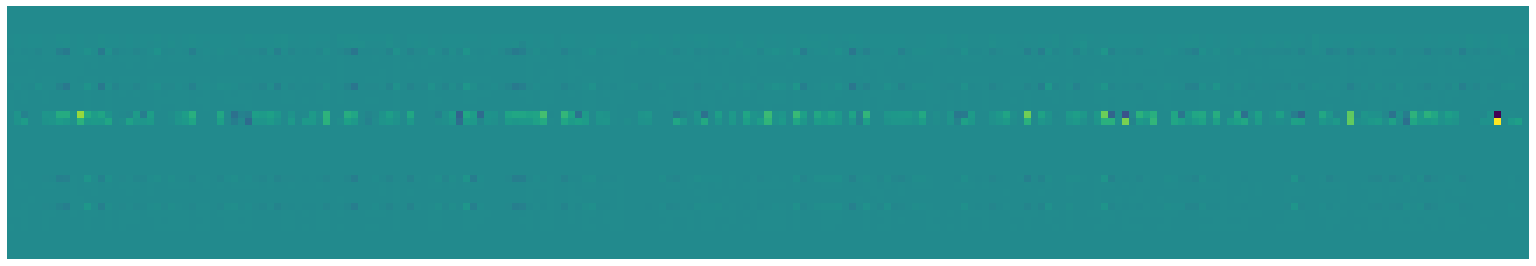

In [16]:
fig = plt.figure(figsize=(60,60))
plt.subplot(121)
plt.imshow(DATA.T)
plt.axis('off')
plt.show()

/home/lolo/anaconda3/envs/ENV/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/lolo/anaconda3/envs/ENV/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


<AxesSubplot:>

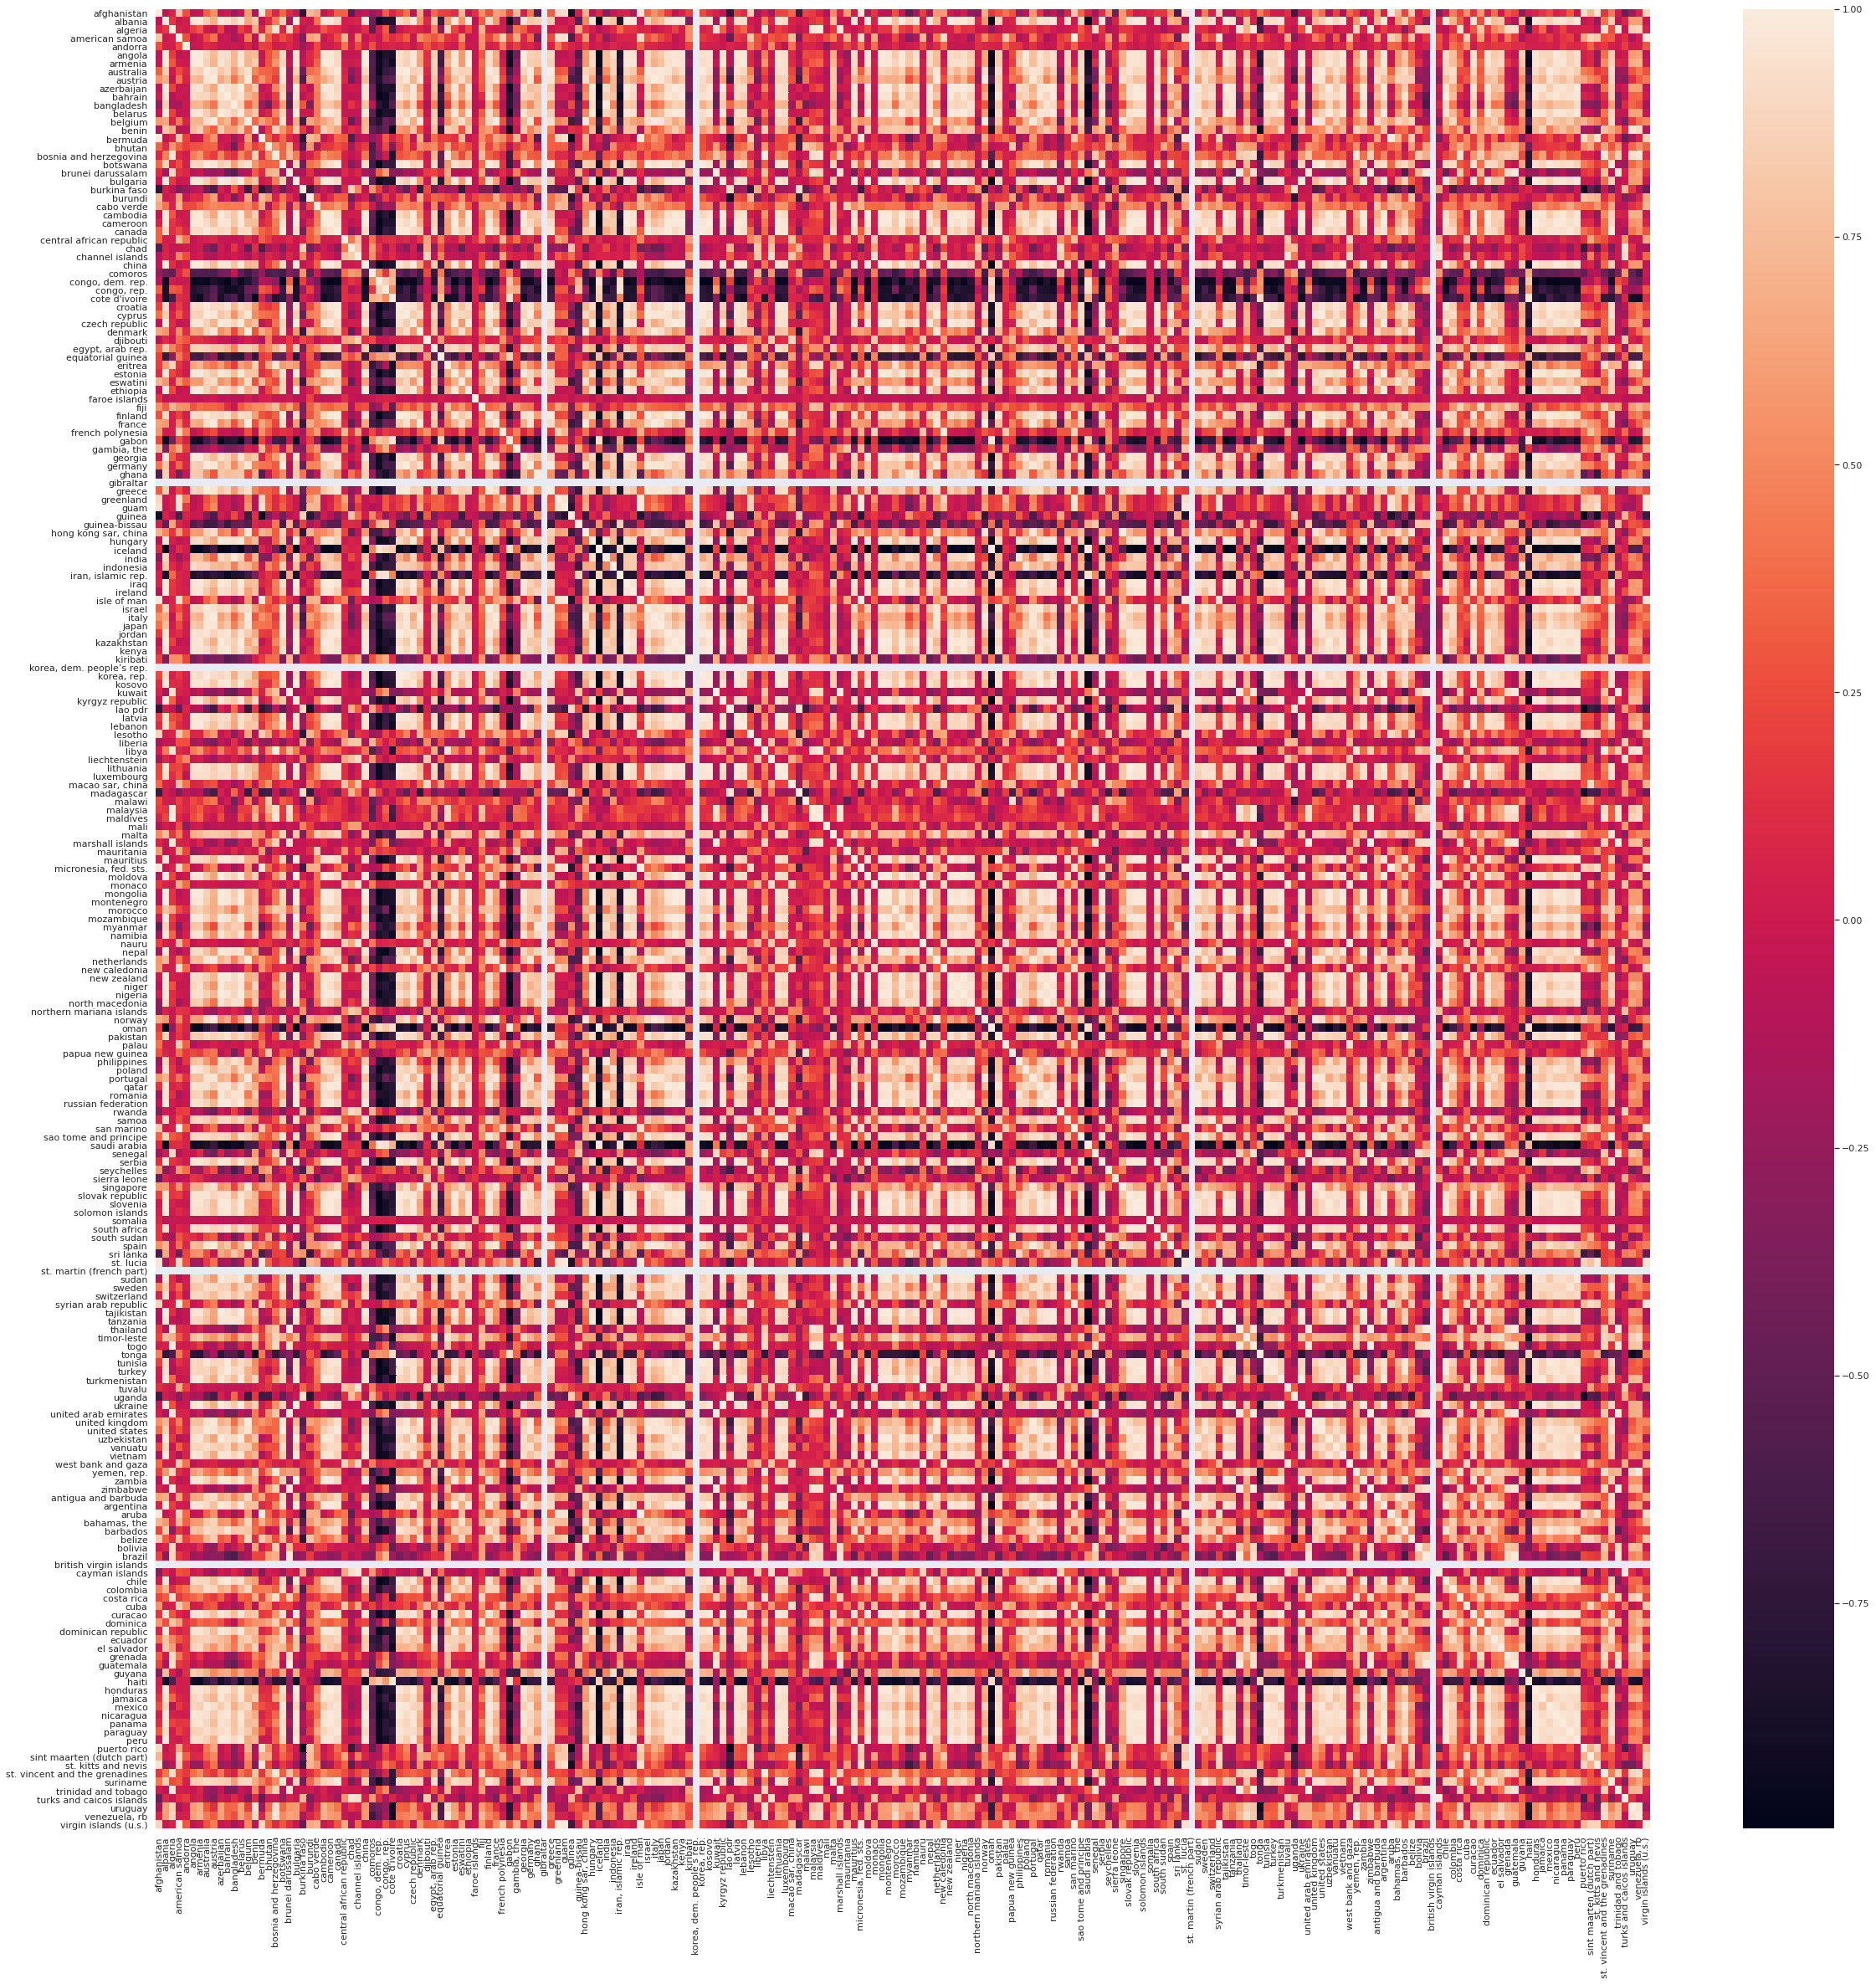

In [17]:
import seaborn as sns
corr = np.corrcoef(DATA)
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(corr, 
            xticklabels=np.append(CNs_check[47:], LA_CAs_check),
            yticklabels=np.append(CNs_check[47:], LA_CAs_check))

In [18]:
from sklearn.feature_selection import SelectKBest, f_regression
from  sklearn.preprocessing import normalize, MinMaxScaler

min_max_scaler = MinMaxScaler().fit(DATA)

DATA_new = SelectKBest(f_regression, k=10).fit_transform(min_max_scaler.transform(DATA), np.append(Label0, Label1, axis=0))
selector = SelectKBest(f_regression, k=10).fit(min_max_scaler.transform(DATA), np.append(Label0, Label1, axis=0))
scores = -np.log10(selector.pvalues_)
print (scores)

[0.18729267 0.1986098  0.2345285  0.14163774 0.0593139  0.19025647
 0.84380282 0.41990331 0.06000939 0.1387324  1.37698024 0.16698066
 0.66634051 0.96075382 0.17084754 0.96488157 0.5675241  0.19417076
 0.16468513 0.24472177 0.34747888 0.17787072 0.12591266 0.00215519
 0.10883418 0.39737536 0.40179478 0.03924811 0.26421721 1.35503151
 0.80896695 0.88574689 0.00780002 0.28618637 0.04285551 0.11200737]


/home/lolo/anaconda3/envs/ENV/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/lolo/anaconda3/envs/ENV/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<AxesSubplot:>

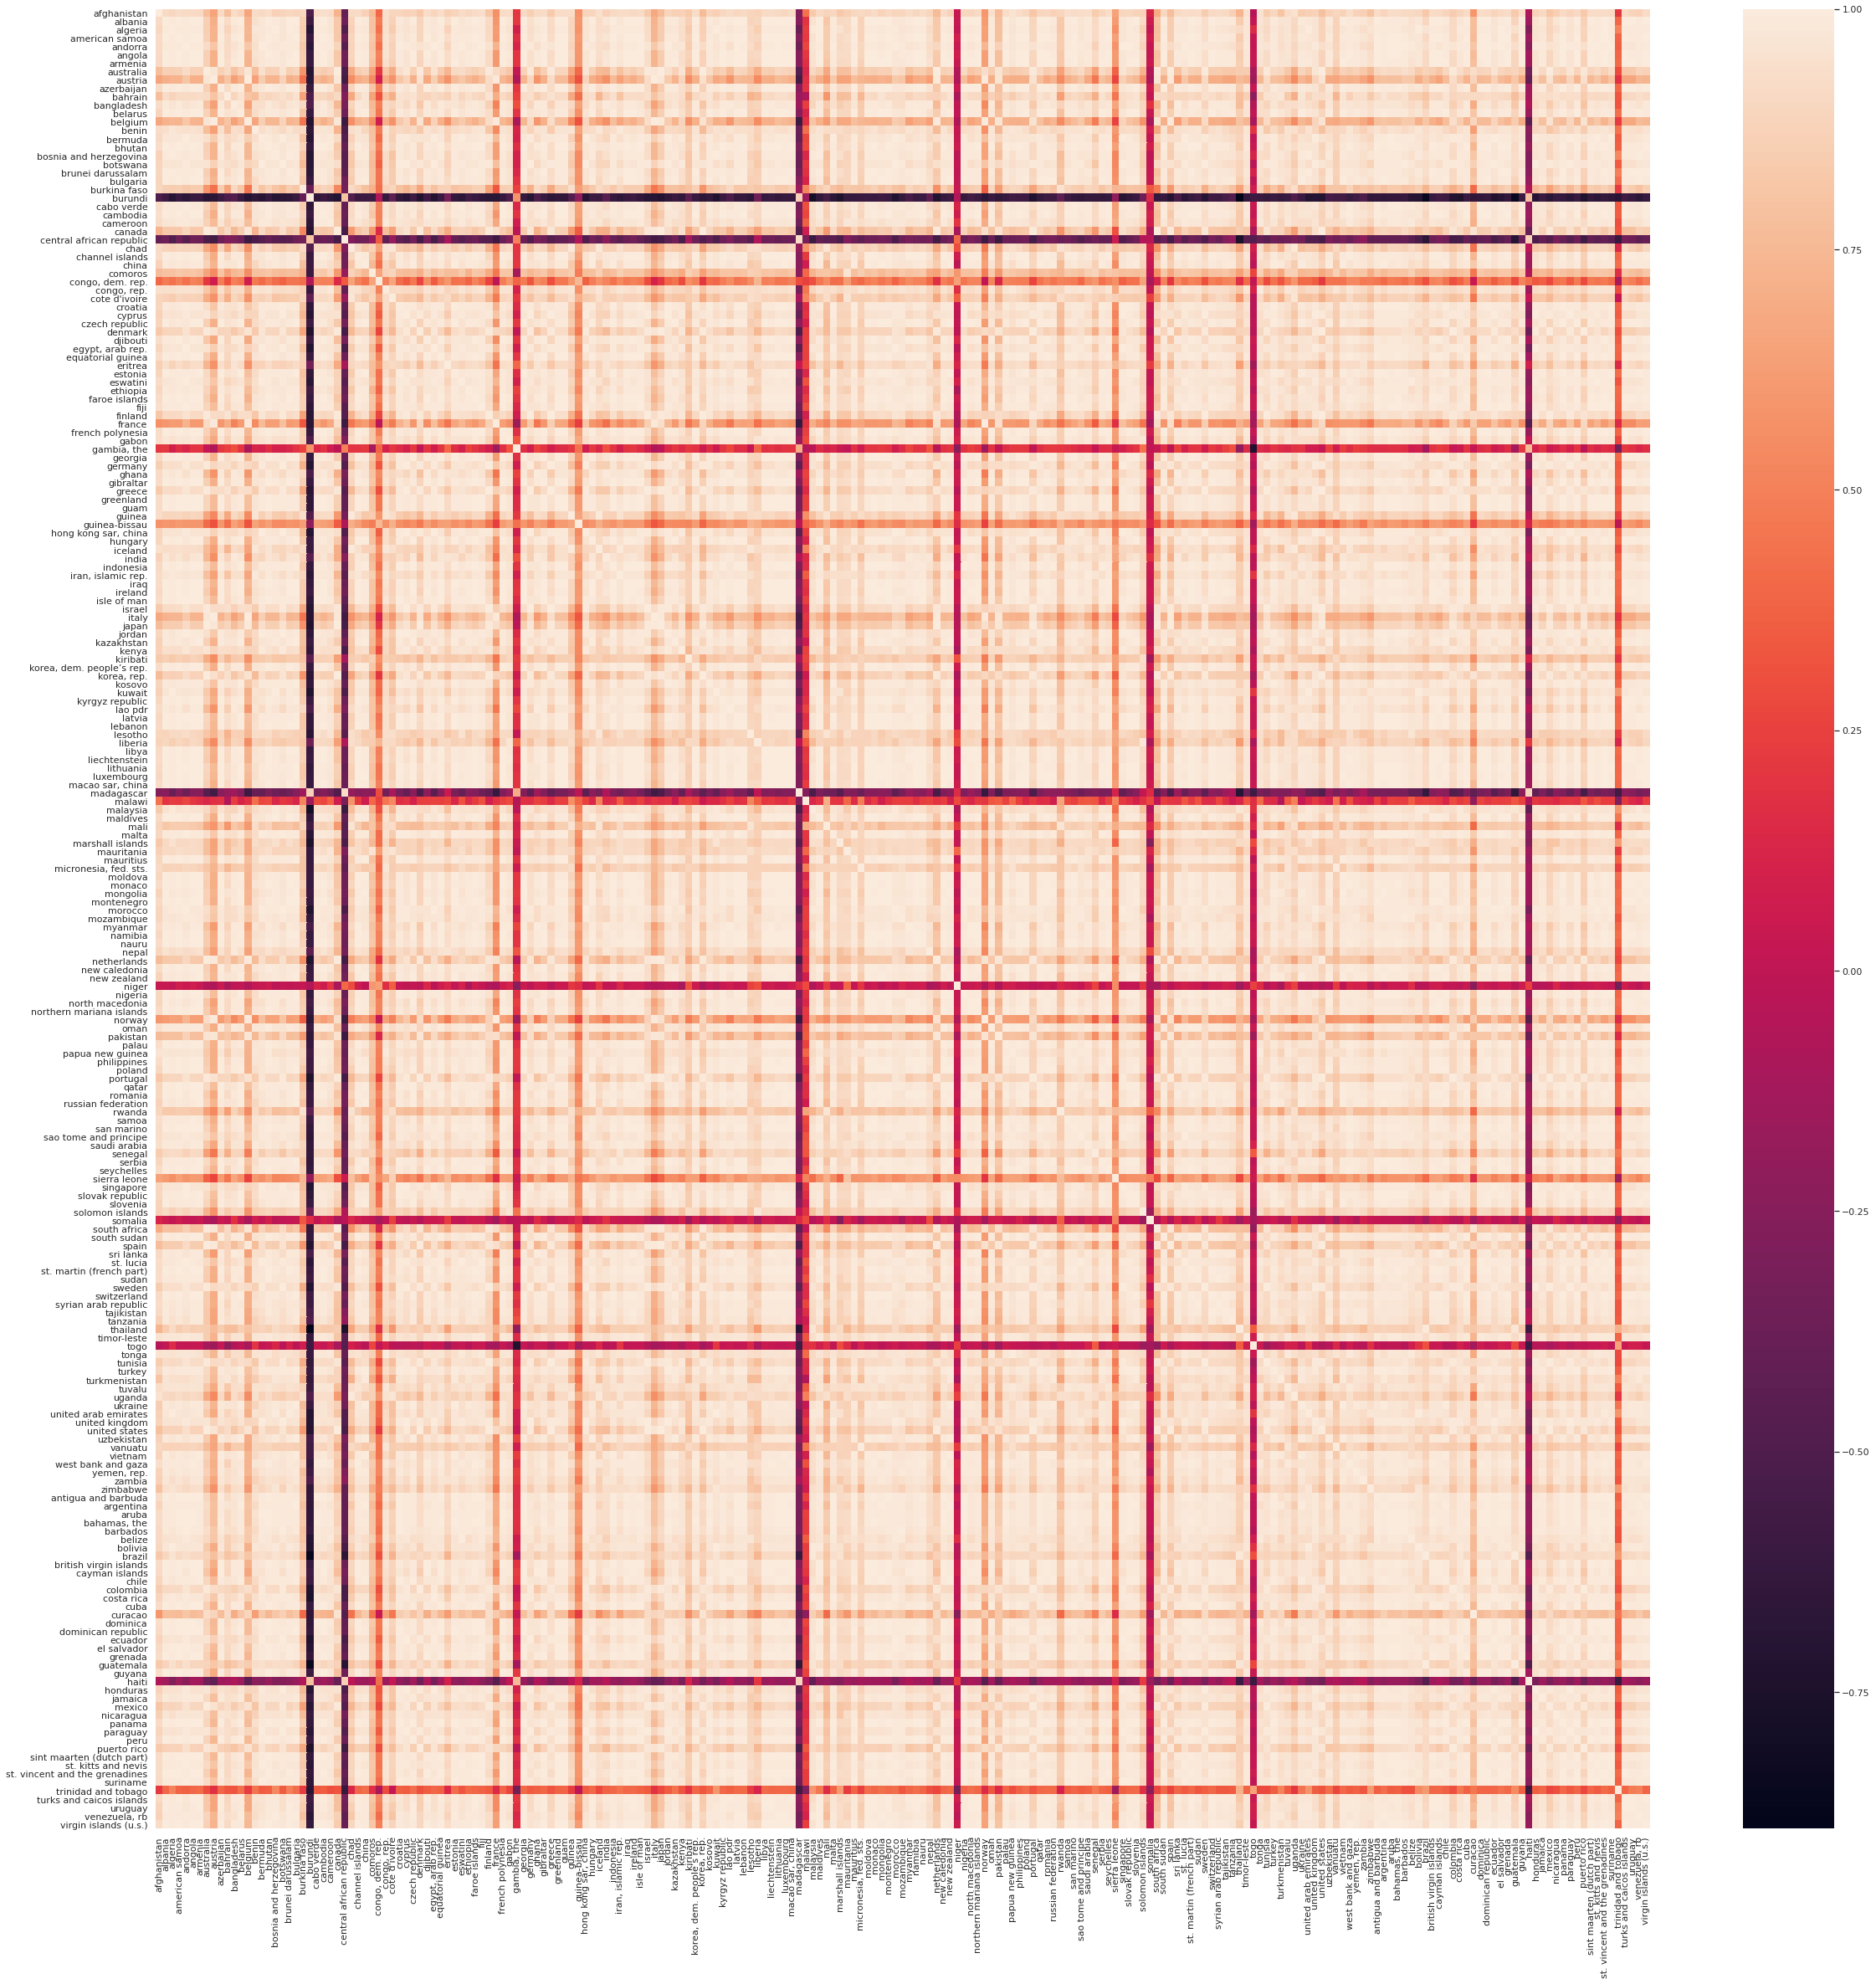

In [19]:
import seaborn as sns
corr = np.corrcoef(DATA_new)
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(corr, 
            xticklabels=np.append(CNs_check[47:], LA_CAs_check),
            yticklabels=np.append(CNs_check[47:], LA_CAs_check))

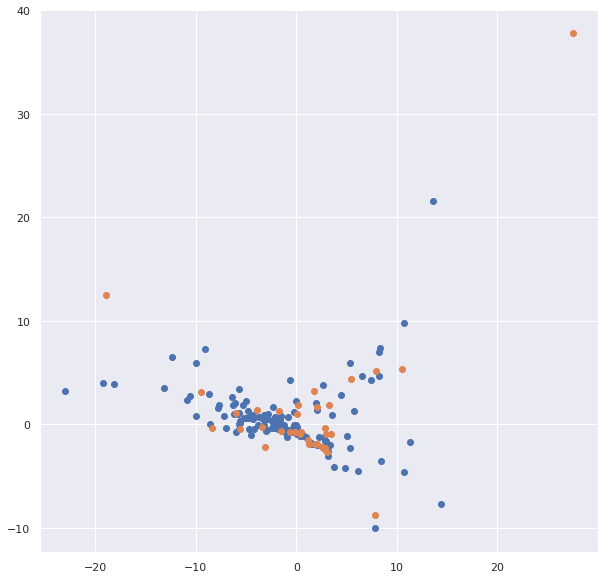

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(DATA).transform(DATA)
fig = plt.figure(figsize=(10,10))
plt.scatter(pca[0:DATA0.shape[0]:,0], pca[0:DATA0.shape[0],1])
plt.scatter(pca[DATA0.shape[0]:,0], pca[DATA0.shape[0]:,1])

In [26]:
X0Training, X0Validation, Y0Training, Y0Validation = train_test_split(DATA0, Label0, test_size=0.25) 
X1Training, X1Validation, Y1Training, Y1Validation = train_test_split(DATA1, Label1, test_size=0.1) 

DATA_training = np.append(X0Training, X1Training, axis=0)
Label_training = np.append(Y0Training, Y1Training, axis=0)
DATA_testing = np.append(X0Validation, X1Validation, axis=0)
Label_testing = np.append(Y0Validation, Y1Validation, axis=0)

In [27]:
counts = np.bincount(Label_training[:, 0].astype(int))
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(Label_training)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]


Number of positive samples in training data: 36 (21.43% of total)


In [28]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [29]:
from sklearn import svm
from sklearn.metrics import f1_score

parg = 0
parn = 0
mscore = 0
# fit the model
for n in range(1,100):
    for g in range(1,200):
        gamma_ = 0.1*g**1.5
        nu_ = 0.01*n
        clf = svm.OneClassSVM(nu=nu_, kernel="rbf", gamma=gamma_)
        clf.fit(DATA0)
        y_pred0 = clf.predict(DATA0)
        score = f1_score(-Label0+1, y_pred0, pos_label=1)
        if score > mscore:
            mscore = score
            parg = gamma_
            parn = nu_
clf = svm.OneClassSVM(nu=parn, kernel="rbf", gamma=parg)
clf.fit(DATA0)        
y_pred0 = clf.predict(DATA0)
y_pred1 = clf.predict(DATA1)
print(parn, parg)

0.25 30.186917696247164


In [30]:
score = f1_score(-Label1, y_pred1, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.987


In [31]:
score = f1_score(-Label0+1, y_pred0, pos_label=1)
print('F1 Score: %.3f' % score)

F1 Score: 0.986


In [32]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Label1.astype('int'), -y_pred1.astype('int'))

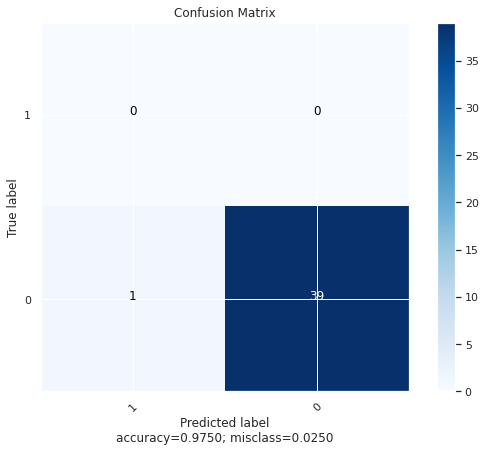

british virgin islands


In [33]:
plot_confusion_matrix(cm           = matrix, 
                      normalize    = False,
                      target_names = ['1', '0'],
                      title        = "Confusion Matrix")
list1 = np.where(y_pred1==1)[0]
for i in range(len(list1)):
    print(LA_CAs_check[list1[i]])

In [34]:
matrix = confusion_matrix(Label0.astype('int')+1, y_pred0.astype('int'))

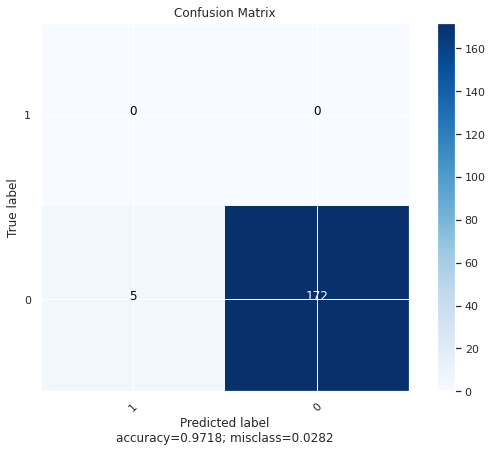

american samoa
ethiopia
fiji
lithuania
slovak republic


In [35]:
plot_confusion_matrix(cm           = matrix, 
                      normalize    = False,
                      target_names = ['1', '0'],
                      title        = "Confusion Matrix")
list0 = np.where(y_pred0==-1)[0]
for i in range(len(list0)):
    print(CNs_check[47+list0[i]])

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
y_score = 1-clf.decision_function(np.append(DATA0, DATA1, axis=0))
y_score = (y_score-np.amin(y_score))/(np.amax(y_score)-np.amin(y_score))
y = label_binarize(np.append(Label0, Label1), classes=range(0, 2)) 
print(y.shape, y_score.shape)

(217, 1) (217,)


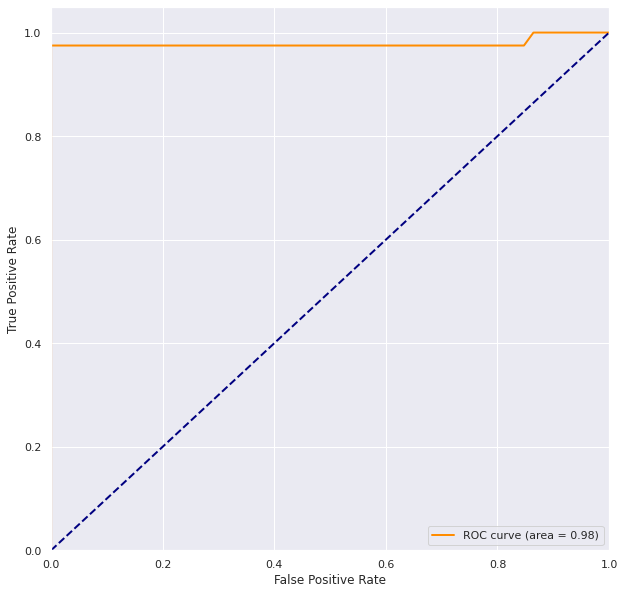

In [37]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(DATA)):
    fpr[i], tpr[i], _ = roc_curve(y, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [38]:
import pickle

filename = 'WDI_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [39]:
loaded_clf = pickle.load(open(filename, 'rb'))
y_pred0 = loaded_clf.predict(DATA0)
score = f1_score(-Label0+1, y_pred0, pos_label=1)
print('F1 Score: %.3f' % score)

F1 Score: 0.986


In [56]:
from keras.layers import Input, Dense, Reshape, Dropout, LSTM, Bidirectional, ConvLSTM2D, MaxPooling1D, Conv1D, Flatten, UpSampling1D, ZeroPadding1D
from keras.layers import BatchNormalization, Activation, ZeroPadding2D, RepeatVector
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils
from keras.utils import plot_model
from keras.regularizers import l1_l2
import keras.backend as K
from keras.models import model_from_json

In [72]:
class GAN():
    
    def __init__(self, rows):
        
        self.seq_length = rows
        self.latent_dim = 4
        self.critic_loss = []
        self.gen_loss = []
        self.clip_value = 0.1
        self.n_critic = 2  
        self.r_alpha = 0.5
        
        optimizer_c = Adam(0.0002, 0.5)
        optimizer_g = Adam(0.0006, 0.5)
        
        self.critic = self.build_critic()
        self.critic.compile(loss='binary_crossentropy', optimizer=optimizer_c)

        self.generator = self.build_generator()        
        input_seq = Input(shape=(self.seq_length, ))
        generated_seq = self.generator(input_seq)
        self.critic.trainable = False
        validity = self.critic(generated_seq)
        self.combined = Model(input_seq, [generated_seq, validity])
        self.combined.compile(loss=['binary_crossentropy', 'binary_crossentropy'], loss_weights=[self.r_alpha, 1], optimizer=optimizer_g)

    def build_critic(self):

        model = Sequential()      
        model.add(Dense(32, activation='relu'))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dropout(0.4))                 
        model.add(Dense(16, activation='relu'))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dropout(0.4))                 
        model.add(Dense(8, activation='relu'))
        model.add(Flatten())         
        model.add(Dense(1, activation='sigmoid'))
        
        input_seq = Input(shape=(self.seq_length, ))
        validity = model(input_seq)
        return Model(input_seq, validity)
      
    def build_generator(self):
        model = Sequential()
        model.add(Dense(32, activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(self.latent_dim, activation='tanh'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(32, activation='relu'))        
        model.add(Dense(self.seq_length, activation='sigmoid'))  
        
        input_seq = Input(shape=(self.seq_length, ))
        output_seq = model(input_seq)
        return Model(input_seq, output_seq)

    def train(self, epochs, batch_size=64, sample_interval=100):

        X_train = DATA_new[0:len(DATA0)]      
        real = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        for epoch in range(epochs):
            
            for _ in range(self.n_critic):
                
                idx = np.random.randint(0, X_train.shape[0], batch_size)
                real_seq = X_train[idx]
                
                gen_seq = self.generator.predict(real_seq)     
                d_loss_real = self.critic.train_on_batch(real_seq, real)
                d_loss_fake = self.critic.train_on_batch(gen_seq, fake)
                d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

                for l in self.critic.layers:
                    
                    weights = l.get_weights()
                    weights = [np.clip(w, -self.clip_value, self.clip_value) for w in weights]
                    l.set_weights(weights)

            c_loss = self.combined.train_on_batch(real_seq, [real_seq, real])
            
            if epoch % sample_interval == 0:
                
              print ("%d [D loss: %f] [G loss: %f] [G loss: %f]" % (epoch, d_loss, c_loss[1], c_loss[0]))
              self.critic_loss.append(d_loss)
              self.gen_loss.append(c_loss)
            
        self.plot_loss()            
            
    def plot_loss(self):
        
        plt.plot(self.critic_loss, c='red')
        plt.plot(self.gen_loss, c='blue')
        plt.title("GAN Loss per Epoch")
        plt.legend(['critic', 'Generator'])
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.savefig('GAN_Loss_per_Epoch_final.png', transparent=True)
        plt.close()

In [73]:
gan = GAN(rows=DATA_new.shape[1])    
gan.train(epochs=1000, batch_size=16, sample_interval=100)

0 [D loss: 0.692584] [G loss: 0.697065] [G loss: 1.041146]
100 [D loss: 0.692452] [G loss: 0.557647] [G loss: 0.968488]
200 [D loss: 0.692305] [G loss: 0.519958] [G loss: 0.950756]
300 [D loss: 0.692605] [G loss: 0.535816] [G loss: 0.955717]
400 [D loss: 0.692777] [G loss: 0.549332] [G loss: 0.960111]
500 [D loss: 0.692522] [G loss: 0.538652] [G loss: 0.955792]
600 [D loss: 0.691948] [G loss: 0.538415] [G loss: 0.954393]
700 [D loss: 0.691004] [G loss: 0.533372] [G loss: 0.952850]
800 [D loss: 0.688823] [G loss: 0.543443] [G loss: 0.948156]
900 [D loss: 0.688247] [G loss: 0.526740] [G loss: 0.933748]


In [76]:
seqs_dis = gan.combined.predict(DATA_new[len(DATA0):])
print(seqs_dis[1][:,0])

[0.51535875 0.5154854  0.5153224  0.5153303  0.51527816 0.5156694
 0.5157178  0.51508445 0.5155684  0.5157763  0.5155631  0.5147578
 0.5152157  0.515492   0.5136031  0.51542777 0.5155368  0.51523685
 0.5157511  0.51551324 0.51535136 0.5158149  0.5171567  0.5156442
 0.51508194 0.51469976 0.515343   0.5155114  0.5151376  0.5156316
 0.5143458  0.5152899  0.5151543  0.51550716 0.51526433 0.5148748
 0.5157344  0.51581085 0.5153866  0.51545495]
